In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
raw_csv_data = pd.read_csv('./data/IndexE8.csv')
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [6]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


# White Noise

In [7]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))

In [8]:
df['wn'] = wn

C:\Users\sigma\AppData\Local\Temp\ipykernel_7228\672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


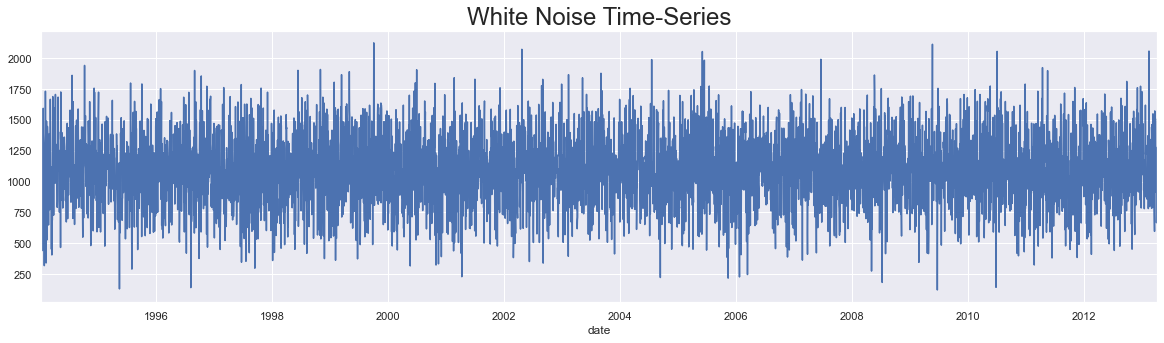

In [9]:
df.wn.plot(figsize=(20,5))
plt.title('White Noise Time-Series', size=24)
plt.show()

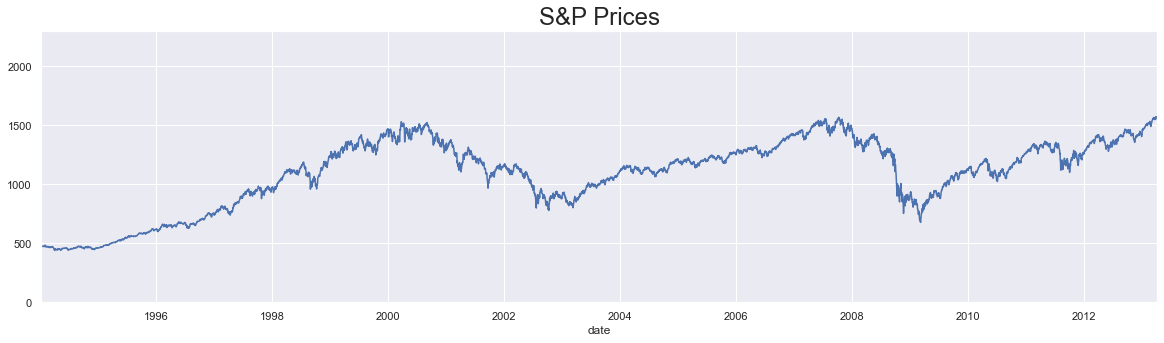

In [10]:
df.market_value.plot(figsize=(20,5))
plt.title('S&P Prices', size=24)
plt.ylim(0, 2300)
plt.show()

# Random Walk

In [11]:
rw = pd.read_csv('./data/RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')

In [12]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [13]:
df['rw'] = rw.price

C:\Users\sigma\AppData\Local\Temp\ipykernel_7228\818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [14]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,923.140305,1122.139662
1994-01-10,475.27,1091.157061,1080.347860
1994-01-11,474.13,1200.842306,1082.095245
1994-01-12,474.17,834.769891,1083.639265
1994-01-13,472.47,1528.980613,1067.146255


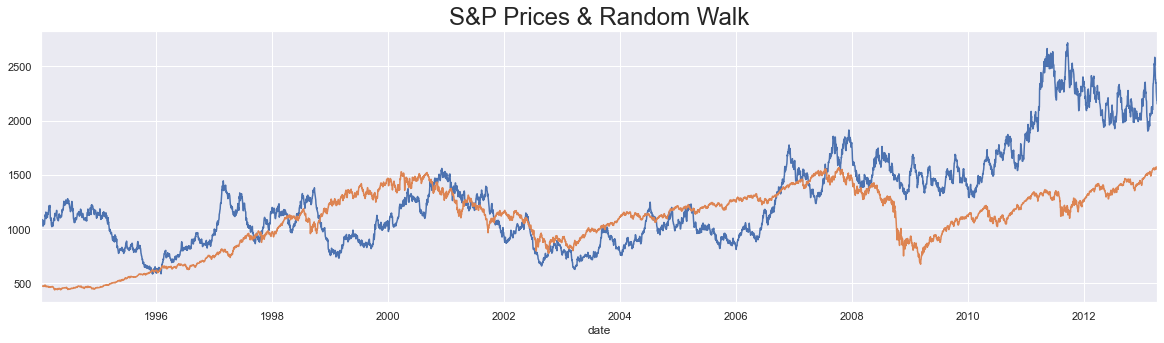

In [15]:
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title('S&P Prices & Random Walk', size=24)
plt.show()

# Stationarity

In [16]:
sts.adfuller(df.market_value)

(-1.7369847452352436,
 0.4121645696770623,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [17]:
sts.adfuller(df.wn)

(-71.06915486331721,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70634.10822878011)

In [18]:
sts.adfuller(df.rw)

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

# Seasonality

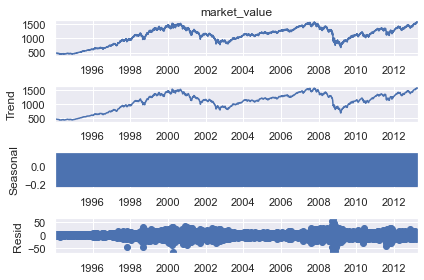

In [19]:
s_dec_additive = seasonal_decompose(df.market_value, model= 'additive')
s_dec_additive.plot()
plt.show()

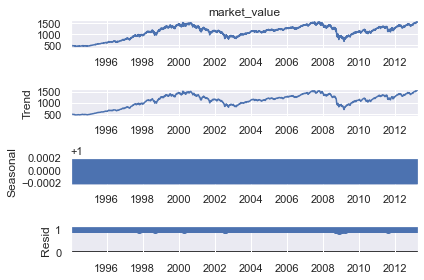

In [20]:
s_dec_additive = seasonal_decompose(df.market_value, model= 'multiplicative')
s_dec_additive.plot()
plt.show()

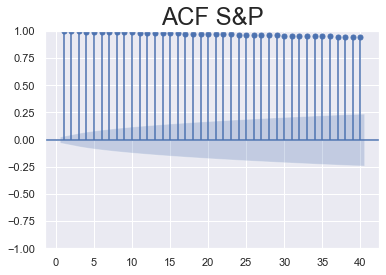

In [21]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title("ACF S&P", size=24)
plt.show()

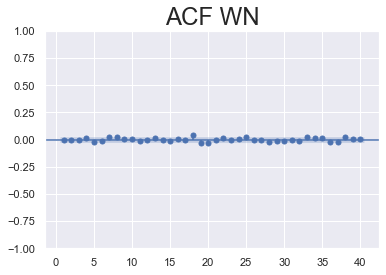

In [22]:
sgt.plot_acf(df.wn, lags=40, zero=False)
plt.title("ACF WN", size=24)
plt.show()

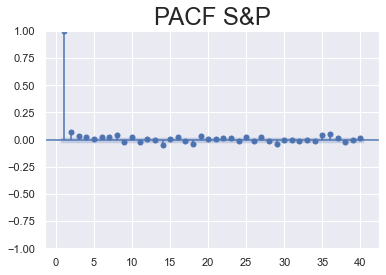

In [23]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method=('ols'))
plt.title("PACF S&P", size=24)
plt.show()

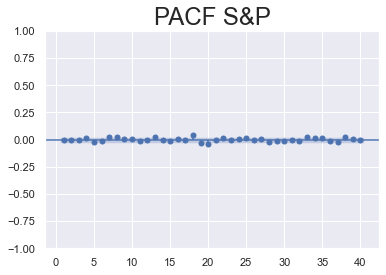

In [24]:
sgt.plot_pacf(df.wn, lags=40, zero=False, method=('ols'))
plt.title("PACF S&P", size=24)
plt.show()